In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np
import matplotlib.pyplot as plt1

In [2]:
df =pd.read_excel('C:/Users/CT/Downloads/archive/online_retail_II.xlsx')

In [3]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Invoice
Invoice
False    525461
Name: count, dtype: int64

StockCode
StockCode
False    525461
Name: count, dtype: int64

Description
Description
False    522533
True       2928
Name: count, dtype: int64

Quantity
Quantity
False    525461
Name: count, dtype: int64

InvoiceDate
InvoiceDate
False    525461
Name: count, dtype: int64

Price
Price
False    525461
Name: count, dtype: int64

Customer ID
Customer ID
False    417534
True     107927
Name: count, dtype: int64

Country
Country
False    525461
Name: count, dtype: int64



In [5]:
df_clean = df.dropna(subset=['Customer ID', 'Description'])



In [6]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Invoice
Invoice
False    525461
Name: count, dtype: int64

StockCode
StockCode
False    525461
Name: count, dtype: int64

Description
Description
False    522533
True       2928
Name: count, dtype: int64

Quantity
Quantity
False    525461
Name: count, dtype: int64

InvoiceDate
InvoiceDate
False    525461
Name: count, dtype: int64

Price
Price
False    525461
Name: count, dtype: int64

Customer ID
Customer ID
False    417534
True     107927
Name: count, dtype: int64

Country
Country
False    525461
Name: count, dtype: int64



In [7]:
print(df['Description'].isnull().sum())

2928


In [8]:
print((df['Description'] == '').sum())

0


In [9]:
df['Description'].replace('', np.nan, inplace=True)

In [10]:
df_clean = df.dropna(subset=['Description'])

In [11]:
print(df.shape)

(525461, 8)


In [12]:
print(df_clean.shape)

(522533, 8)


In [13]:
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['Price'] > 0]


In [14]:
df_clean.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [15]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']


In [16]:
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [17]:
print("Data shape")
df_clean.shape
print("Data info")
df_clean.info()
print("Data Describe")
df_clean.describe()

Data shape
Data info
<class 'pandas.core.frame.DataFrame'>
Index: 511566 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      511566 non-null  object        
 1   StockCode    511566 non-null  object        
 2   Description  511566 non-null  object        
 3   Quantity     511566 non-null  int64         
 4   InvoiceDate  511566 non-null  datetime64[ns]
 5   Price        511566 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      511566 non-null  object        
 8   TotalPrice   511566 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 39.0+ MB
Data Describe


,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,511566.000000,511566,511566.000000,407664.000000,511566.000000
mean,11.400150,2010-06-28 22:20:30.395491584,4.252563,15368.592598,20.146502
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,1.000000,2010-03-21 15:22:00,1.250000,13997.000000,4.200000
50%,3.000000,2010-07-07 09:41:00,2.100000,15321.000000,10.140000
75%,10.000000,2010-10-15 15:06:00,4.210000,16812.000000,17.700000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,25111.090000
std,86.761177,NaN,63.664629,1679.762138,90.920077


In [18]:
df_clean['Customer ID'].nunique()
#df_clean['Invoice'].nunique()

4312

In [19]:
df_clean['TotalPrice'].sum()

np.float64(10306265.594)

In [20]:
df_clean.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
#10 customer represant 10% from Totalprice

Customer ID
18102.0    349164.35
14646.0    248396.50
14156.0    196566.74
14911.0    152147.57
13694.0    131443.19
17511.0     84541.17
15061.0     83284.38
16684.0     80489.21
16754.0     65500.07
17949.0     60117.60
Name: TotalPrice, dtype: float64

In [21]:
df_clean.groupby('Customer ID')['Invoice'].nunique().describe()

count    4312.000000
mean        4.455705
std         8.170213
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       205.000000
Name: Invoice, dtype: float64

In [22]:
df_clean.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False).head(10)


Customer ID
14911.0    205
17850.0    155
12748.0    144
15311.0    121
13089.0    109
14606.0    102
14156.0    102
13694.0     94
17841.0     91
18102.0     89
Name: Invoice, dtype: int64

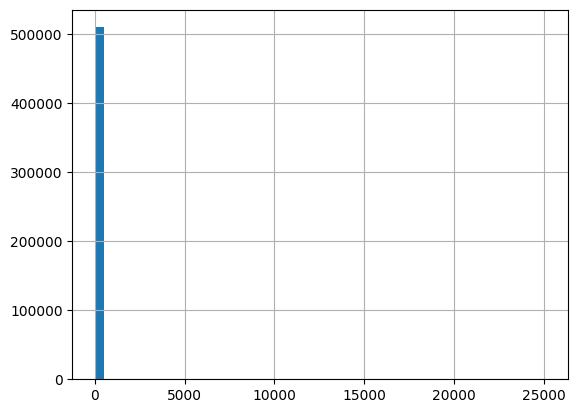

In [23]:


df_clean['TotalPrice'].hist(bins=50)
plt1.show()

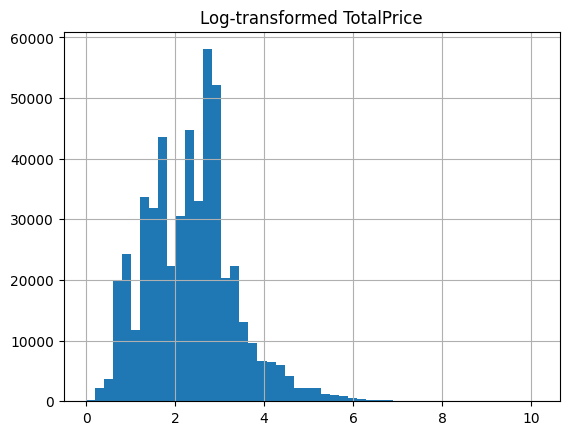

In [24]:
import numpy as np
df_clean['LogTotalPrice'] = np.log1p(df_clean['TotalPrice'])  # log(1 + x)
df_clean['LogTotalPrice'].hist(bins=50)
plt.title('Log-transformed TotalPrice')
plt.show()


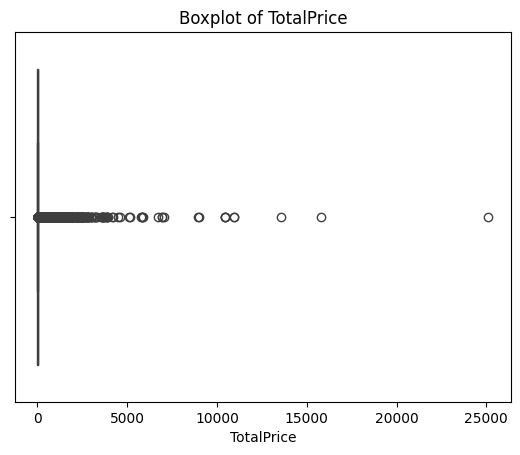

In [25]:
import seaborn as sns
sns.boxplot(x=df_clean['TotalPrice'])
plt.title('Boxplot of TotalPrice')
plt.show()


In [26]:
import datetime as dt

reference_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)


In [27]:
rfm = df_clean.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency','Frequency','Monetary']


In [28]:
rfm.describe()


,Recency,Frequency,Monetary
count,4312.000000,4312.000000,4312.000000
mean,91.171846,4.455705,2048.238236
std,96.860633,8.170213,8914.481280
min,1.000000,1.000000,2.950000
25%,18.000000,1.000000,307.987500
50%,53.000000,2.000000,706.020000
75%,136.000000,5.000000,1723.142500
max,374.000000,205.000000,349164.350000


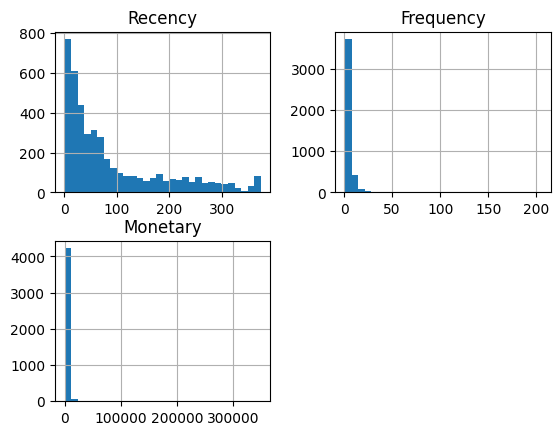

In [29]:
rfm[['Recency','Frequency','Monetary']].hist(bins=30)
plt.show()


In [30]:
rfm['R_Score']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
rfm['RFM_score']=(
    rfm['R_Score'].astype(str)+
    rfm['F_Score'].astype(str)+
    rfm['M_Score'].astype(str)
)

In [31]:
rfm.sort_values('Monetary',ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_score
Customer ID,,,,,,,
18102.0,1,89,349164.35,4,4,4,444
14646.0,10,78,248396.50,4,4,4,444
14156.0,7,102,196566.74,4,4,4,444
14911.0,1,205,152147.57,4,4,4,444
13694.0,9,94,131443.19,4,4,4,444
17511.0,3,31,84541.17,4,4,4,444
15061.0,3,86,83284.38,4,4,4,444
16684.0,15,27,80489.21,4,4,4,444
16754.0,8,29,65500.07,4,4,4,444


In [32]:
rfm[rfm["RFM_score"]=='444'].count()

Recency      458
Frequency    458
Monetary     458
R_Score      458
F_Score      458
M_Score      458
RFM_score    458
dtype: int64

In [33]:
rfm['RFM_score'].value_counts().sort_index()

RFM_score
111    341
112    138
113     29
114      7
121    171
      ... 
433    143
434     46
442      9
443    120
444    458
Name: count, Length: 62, dtype: int64

In [34]:
rfm['RFM_score'].value_counts().head(10)


RFM_score
444    458
111    341
344    217
333    171
121    171
233    158
433    143
211    139
112    138
322    124
Name: count, dtype: int64

In [35]:
champions = rfm[rfm['RFM_score'] == '444']
champions.shape


(458, 7)

In [36]:
champions[['Recency','Frequency','Monetary']].mean()


Recency         7.445415
Frequency      16.257642
Monetary     9772.043325
dtype: float64

In [38]:
def rfm_segment(row):
    if row['RFM_score'] == '444':
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'Potential Loyalists'
    elif row['R_Score'] == 1:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)


In [39]:
rfm['Segment'].value_counts()


Segment
Others                 1286
Loyal Customers        1013
At Risk                 870
Potential Loyalists     685
Champions               458
Name: count, dtype: int64